# <font color="red"><b>(Lecture 3) Training Deep Neural Networks on a GPU with PyTorch</b></font>

### <font color="#FF00FF">Part 4 of "Deep Learning with Pytorch: Zero to GANs"</font>

This tutorial series is a hands-on beginner-friendly introduction to deep learning using [PyTorch](https://pytorch.org), an open-source neural networks library. These tutorials take a practical and coding-focused approach. The best way to learn the material is to execute the code and experiment with it yourself. Check out the full series here:

1. [PyTorch Basics: Tensors & Gradients](https://jovian.ai/aakashns/01-pytorch-basics)
2. [Gradient Descent & Linear Regression](https://jovian.ai/aakashns/02-linear-regression)
3. [Working with Images & Logistic Regression](https://jovian.ai/aakashns/03-logistic-regression)
4. [Training Deep Neural Networks on a GPU](https://jovian.ai/aakashns/04-feedforward-nn)
5. [Image Classification using Convolutional Neural Networks](https://jovian.ai/aakashns/05-cifar10-cnn)
6. [Data Augmentation, Regularization and ResNets](https://jovian.ai/aakashns/05b-cifar10-resnet)
7. [Generating Images using Generative Adversarial Networks](https://jovian.ai/aakashns/06b-anime-dcgan/)


 This tutorial covers the following topics:

 * Creating a deep neural network with hidden layers
 * Using a non-linear activation function
 * Using a GPU (when available) to speed up training
 * Experimenting with hyperparameters to improve the model

### How to run the code

This tutorial is an executable [Jupyter notebook](https://jupyter.org) hosted on [Jovian](https://www.jovian.ai). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Colab**. [Google Colab](https://colab.research.google.com) is a free online platform for running Jupyter notebooks using Google's cloud infrastructure. You can also select "Run on Binder" or "Run on Kaggle" if you face issues running the notebook on Google Colab.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

>  **Jupyter Notebooks**: This tutorial is a [Jupyter notebook](https://jupyter.org) - a document made of _cells_. Each cell can contain code written in Python or explanations in plain English. You can execute code cells and view the results, e.g., numbers, messages, graphs, tables, files, etc., instantly within the notebook. Jupyter is a powerful platform for experimentation and analysis. Don't be afraid to mess around with the code & break things - you'll learn a lot by encountering and fixing errors. You can use the "Kernel > Restart & Clear Output" or "Edit > Clear Outputs" menu option to clear all outputs and start again from the top.

### Using a GPU for faster training

You can use a [Graphics Processing Unit](https://en.wikipedia.org/wiki/Graphics_processing_unit) (GPU) to train your models faster if your execution platform is connected to a GPU manufactured by NVIDIA. Follow these instructions to use a GPU on the platform of your choice:

* _Google Colab_: Use the menu option "Runtime > Change Runtime Type" and select "GPU" from the "Hardware Accelerator" dropdown.
* _Kaggle_: In the "Settings" section of the sidebar, select "GPU" from the "Accelerator" dropdown. Use the button on the top-right to open the sidebar.
* _Binder_: Notebooks running on Binder cannot use a GPU, as the machines powering Binder aren't connected to any GPUs.
* _Linux_: If your laptop/desktop has an NVIDIA GPU (graphics card), make sure you have installed the [NVIDIA CUDA drivers](https://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html).
* _Windows_: If your laptop/desktop has an NVIDIA GPU (graphics card), make sure you have installed the [NVIDIA CUDA drivers](https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html).
* _macOS_: macOS is not compatible with NVIDIA GPUs


If you do not have access to a GPU or aren't sure what it is, don't worry, you can execute all the code in this tutorial just fine without a GPU.

## Preparing the Data

In [the previous tutorial](https://jovian.ai/aakashns/03-logistic-regression), we trained a logistic regression model to identify handwritten digits from the MNIST dataset with an accuracy of around 86%. The dataset consists of 28px by 28px grayscale images of handwritten digits (0 to 9) and labels for each image indicating which digit it represents. Here are some sample images from the dataset:

![mnist-sample](https://i.imgur.com/CAYnuo1.jpg)

We noticed that it's quite challenging to improve the accuracy of a logistic regression model beyond 87%, since the model assumes a linear relationship between pixel intensities and image labels. In this post, we'll try to improve upon it  using a *feed-forward neural network* which can capture non-linear relationships between inputs and targets.

Let's begin by installing and importing the required modules and classes from `torch`, `torchvision`, `numpy`, and `matplotlib`.

In [ ]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Windows
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS
# !pip install numpy matplotlib torch torchvision torchaudio

In [1]:
# 必需
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

We can download the data and create a PyTorch dataset using the `MNIST` class from `torchvision.datasets`.

In [ ]:
# 必需
dataset = MNIST(root='data/', download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



<font color="red">If you got an issue about "[Errno -3] Temporary failure in name resolution - Kaggle", one can review "https://www.kaggle.com/discussions/getting-started/132390".</font>

Let's look at a couple of images from the dataset. The images are converted to PyTorch tensors with the shape `1x28x28` (the dimensions represent color channels, width and height). We can use `plt.imshow` to display the images. However, `plt.imshow` expects channels to be last dimension in an image tensor, so we use the `permute` method to reorder the dimensions of the image.

In [ ]:
# (展示)資料筆數
# len(dataset)

60000

image.shape: torch.Size([1, 28, 28])

Label: 5


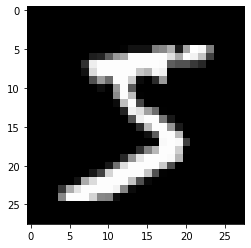

In [ ]:
# (展示)image 改成了 image_0，label 改成了 label_0

# image_0, label_0 = dataset[0]
# print('image_0.shape:', image_0.shape)
# plt.imshow(image_0.permute(1, 2, 0), cmap='gray')
# print('label_0:', label_0)

image.shape: torch.Size([1, 28, 28])

Label: 0


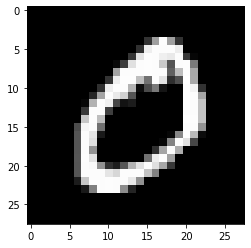

In [ ]:
# (展示)image 改成了 image_1，label 改成了 label_1

# image_1, label_1 = dataset[1]
# print('image_1.shape:', image_1.shape)
# plt.imshow(image_1.permute(1, 2, 0), cmap='gray')
# print('label_1:', label_1)

Next, let's use the `random_split` helper function to set aside 10000 images for our validation set. <br>
`random_split` 把資料集 `dataset` 亂數分割，根據 `[train_size, val_size]`

In [3]:
# 必需
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

```python
# (展示)
len(train_ds), len(val_ds) # (50000, 10000)
```

We can now create PyTorch data loaders for training and validation.

In [4]:
# 必需 128
batch_size=128

In [ ]:
# 必需。num_workers原本為4
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

<font color="red">train_loader</font>包含了<font color="pink">390個</font>  128x1x28x28的tensor(影像image) + 長度128的一維tensor(標籤label)
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;+<font color="pink">1個</font>80x1x28x28的tensor(影像image) +  長度80的一維tensor(標籤label)
<br>
<font color="red">val_loader</font>包含了<font color="pink">78個</font>  128x1x28x28的tensor(影像image) + 長度128的一維tensor(標籤label)
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;+<font color="pink">1個</font>16x1x28x28的tensor(影像image) +  長度16的一維tensor(標籤label)


In [73]:
atupl = (1, 7, 7, 8, 6, 4, 7, 0, 5, 6, 3, 9, 7, 9, 0, 7, 6, 2, 6, 9, 2, 1, 0, 0, 6, 9, 8, 4, 7, 1, 2, 1)

In [75]:
torch.tensor(atupl)

tensor([1, 7, 7, 8, 6, 4, 7, 0, 5, 6, 3, 9, 7, 9, 0, 7, 6, 2, 6, 9, 2, 1, 0, 0,
        6, 9, 8, 4, 7, 1, 2, 1])

 batch 是  list，有 32個 tuple, 每一個 tuple, 有一個大小 [1,28,28] 的 tensor 與 一個整數

 batch 解壓後，data 是一個 tuple，包含 32個 tensor。

 target 是一個 tuple，包含 32個 int，所以若使永 `torch.stack(target)` 會出現錯誤。

In [79]:
def collate_fn_gpu(batch):
      data, target = zip(*batch) # 解壓 batch
      data = torch.stack(data).to(device)
      # target = torch.stack(target).to(device) # 會出錯，因為輸入 target 是 tuple ，而非 tensor
      target = torch.tensor(target).to(device)
      return data, target

In [80]:
dler = DataLoader(train_ds, batch_size=32, shuffle=True, collate_fn=collate_fn_gpu)

In [81]:
for imgs, lbs in dler:
  print('imgs.shape:',imgs.shape)
  print('lbs.shape:',lbs.shape)
  break;

imgs.shape: torch.Size([32, 1, 28, 28])
lbs.shape: torch.Size([32])


Can you figure out the purpose of the arguments `num_workers` and `pin_memory`? Try looking into the documentation: https://pytorch.org/docs/stable/data.html .

Let's visualize a batch of data in a grid using the `make_grid` function from `torchvision`. We'll also use the `.permute` method on the tensor to move the channels to the last dimension, as expected by `matplotlib`.

imgs.shape: torch.Size([128, 1, 28, 28])

tensor([8, 8, 3, 1, 8, 8, 5, 4, 9, 9, 5, 5, 9, 2, 3, 9, 7, 9, 8, 0, 0, 0, 5, 5,

        1, 1, 1, 3, 6, 3, 1, 6, 9, 8, 3, 8, 8, 0, 8, 3, 5, 6, 5, 1, 4, 3, 4, 3,

        2, 3, 8, 7, 7, 8, 7, 6, 7, 7, 2, 1, 9, 8, 7, 2, 0, 4, 6, 6, 8, 3, 5, 5,

        1, 9, 7, 1, 3, 1, 0, 2, 5, 8, 7, 2, 1, 1, 1, 7, 6, 3, 4, 8, 6, 9, 0, 3,

        3, 7, 0, 6, 8, 6, 7, 6, 8, 6, 0, 3, 8, 7, 3, 0, 9, 2, 9, 9, 8, 8, 3, 6,

        2, 8, 3, 0, 9, 9, 6, 6])


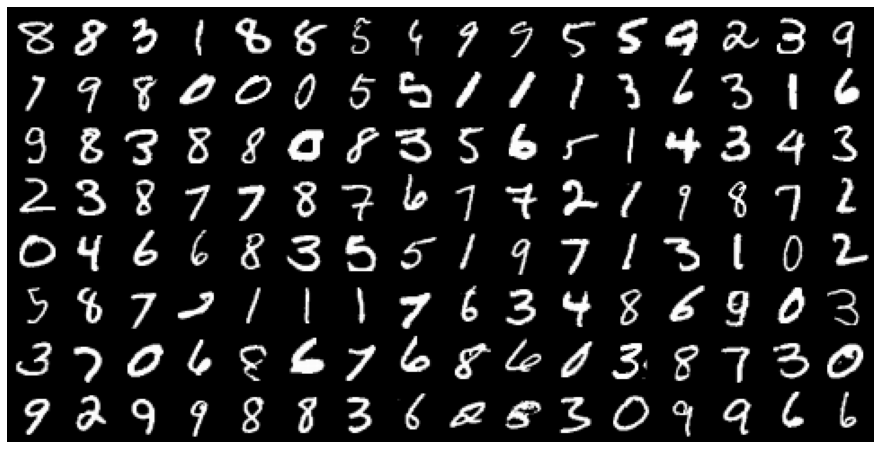

In [ ]:
# (展示)images 改成 imgs，_ (underscore) 改成 lbs

# for imgs, lbs in train_loader:
#     print('imgs.shape:', imgs.shape)
#     plt.figure(figsize=(16,8))
#     plt.axis('off')
#     plt.imshow(make_grid(imgs, nrow=16).permute((1, 2, 0)))
#     break
# print(lbs) # 新增

In [ ]:
# (展示) images 改成了 imgs
# print(imgs.shape)                     # 128x1x28x28
# print(make_grid(imgs, nrow=16).shape) #   3x242x482

torch.Size([128, 1, 28, 28])

torch.Size([3, 242, 482])


#### <font color="purple">說明</font>
<font color="red">nrow</font>: 每一個row要顯示圖的數目，所以會有8個row( 8x16=128 )  
default padding 是<font color="red">2</font>  
<font color="red">3</font>: 複製三個tensor後合併(參考https://github.com/pytorch/vision/issues/863) <br>
<font color="red">242</font>: 8x28+(8+1)x2  
<font color="red">482</font>: 16x28+(16+1)x2  

## Hidden Layers, Activation Functions and Non-Linearity

We'll create a neural network with two layers: a _hidden layer_ and an _output layer_. Additionally, we'll use an _activation function_ between the two layers. Let's look at a step-by-step example to learn how hidden layers and activation functions can help capture non-linear relationships between inputs and outputs.

First, let's create a batch of inputs tensors. We'll flatten the `1x28x28` images into vectors of size `784`, so they can be passed into an `nn.Linear` object.

<font color="red">train_loader</font>包含了<font color="pink">390個</font>  128x1x28x28的tensor(影像image) + 長度128的一維tensor(標籤label)
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;+<font color="pink">1個</font>80x1x28x28的tensor(影像image) +  長度80的一維tensor(標籤label)
<br>
所以下<font color="green">break</font>的原因，只會從train_loader中取出一個batch = (images, labels) <br>
images  128x1x28x28的tensor(影像image) <br>
labesls   長度128 的一維tensor(標籤label)

In [ ]:
# 必需(1) 從50000筆取出128筆資料 images是128個影像 labels是128個標籤
for images, labels in train_loader:
    print('images.shape:', images.shape)
    print('labels.shape:=', labels.shape)

    inputs = images.reshape(-1, 784)     #-1代表n，n=tensor的長度/第一個參數
    print('inputs.shape:', inputs.shape) # images經過reshape後的型態
    break

images.shape: torch.Size([128, 1, 28, 28])
labels.shape:= torch.Size([128])
inputs.shape: torch.Size([128, 784])


Next, let's create a `nn.Linear` object, which will serve as our _hidden_ layer. We'll set the size of the output from the hidden layer to 32. This number can be increased or decreased to change the _learning capacity_ of the model.

In [7]:
# 必需(1)
input_size = inputs.shape[-1] # input_size = 784。-1代表最後一軸。
hidden_size = 32

In [8]:
# 必需(1) #    輸入(batch_size,784)  layer1為輸出(batch_size,32)
layer1 = nn.Linear(input_size, hidden_size)

We can now compute intermediate outputs for the batch of images by passing `inputs` through `layer1`.

In [ ]:
# 測試用
# list(layer1.parameters())
# 包含兩個tensor，第一個就等於layer1.weight，第二個就等於layer1.bias

In [ ]:
# 展示用
# print(inputs.shape)
# print(layer1.weight.shape)
# print(layer1.bias.shape)

torch.Size([128, 784])

torch.Size([32, 784])

torch.Size([32])


In [9]:
# 必需(1) inputs輸入：batch_sizex784。layer1_outputs輸出：batch_sizex32   !!batch_size=128
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


The image vectors of size `784` are transformed into intermediate output vectors of length `32` by performing a matrix multiplication of `inputs` matrix with the transposed weights matrix of `layer1` and adding the bias. We can verify this using `torch.allclose`. For a more detailed explanation, review the tutorial on [linear regression](https://jovian.ai/aakashns/02-linear-regression).

In [10]:
# 必需(1)
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape
# inputs:  128x784
# layer1.weight: 32x784
# layer1.bias: 32 (延伸成 128x32)
# ------------------------------
# layer1_outputs_direct: 128x32

torch.Size([128, 32])

In [ ]:
# (展示)
# torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

Thus, `layer1_outputs` and `inputs` have a linear relationship, i.e., each element of `layer_outputs` is a weighted sum of elements from `inputs`. Thus, even as we train the model and modify the weights, `layer1` can only capture linear relationships between `inputs` and `outputs`.

<img src="https://i.imgur.com/inXsLuq.png" width="360">


Next, we'll use the Rectified Linear Unit (ReLU) function as the activation function for the outputs. It has the formula `relu(x) = max(0,x)` i.e. it simply replaces negative values in a given tensor with the value 0. ReLU is a non-linear function, as seen here visually:

<img src="https://i.imgur.com/yijV4xF.png" width="420">

We can use the `F.relu` method to apply ReLU to the elements of a tensor.

In [ ]:
# (展示)示範relu作用

# F.relu(torch.tensor([[1, -1, 0],
#                      [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

Let's apply the activation function to `layer1_outputs` and verify that negative values were replaced with 0.

In [ ]:
# 必需(1) layer1_outputs輸入：batch_sizex32 。 relu_outputs輸出：batch_sizex32
relu_outputs = F.relu(layer1_outputs)

# (展示)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.6351039409637451
min(relu_outputs): 0.0


Now that we've applied a non-linear activation function, `relu_outputs` and `inputs` do not have a linear relationship. We refer to `ReLU` as the _activation function_, because for each input certain outputs are activated (those with non-zero values) while others turned off (those with zero values)

Next, let's create an output layer to convert vectors of length `hidden_size` in `relu_outputs` into vectors of length 10, which is the desired output of our model (since there are 10 target labels).

In [13]:
# 必需(1)   輸入(batch_size,32)  layer2為輸出(batch_size,10)
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [14]:
# 必需(1)  relu_outputs輸入：batch_sizex32。layer2_outputs輸出：batch_sizex10   !!batch_size=128
layer2_outputs = layer2(relu_outputs)
# (展示)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [ ]:
# (展示)inputs.shape，輔助用
# inputs.shape

torch.Size([128, 784])

As expected, `layer2_outputs` contains a batch of vectors of size 10. We can now use this output to compute the loss using `F.cross_entropy` and adjust the weights of `layer1` and `layer2` using gradient descent.

In [ ]:
# 必需(1)
F.cross_entropy(layer2_outputs, labels)

tensor(2.3079, grad_fn=<NllLossBackward0>)

Thus, our model transforms `inputs` into `layer2_outputs` by applying a linear transformation (using `layer1`), followed by a non-linear activation (using `F.relu`), followed by another linear transformation (using `layer2`). Let's verify this by re-computing the output using basic matrix operations.

In [16]:
# 必需(1) Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [ ]:
# (展示)
# torch.allclose(outputs, layer2_outputs, 1e-3)

True

Note that `outputs` and `inputs` do not have a linear relationship due to the non-linear activation function `F.relu`. As we train the model and adjust the weights of `layer1` and `layer2`, we can now capture non-linear relationships between the images and their labels. In other words, introducing non-linearity makes the model more powerful and versatile. Also, since `hidden_size` does not depend on the dimensions of the inputs or outputs, we vary it to increase the number of parameters within the model. We can also introduce new hidden layers and apply the same non-linear activation after each hidden layer.

The model we just created is called a neural network. A _deep neural network_ is simply a neural network with one or more hidden layers. In fact, the [Universal Approximation Theorem](http://neuralnetworksanddeeplearning.com/chap4.html) states that a sufficiently large & deep neural network can compute any arbitrary function i.e. it can _learn_ rich and complex non-linear relationships between inputs and targets. Here are some examples:

* Identifying if an image contains a cat or a dog (or [something else](https://machinelearningmastery.com/introduction-to-the-imagenet-large-scale-visual-recognition-challenge-ilsvrc/))
* Identifying the genre of a song using a 10-second sample
* Classifying movie reviews as positive or negative based on their content
* Navigating self-driving cars using a video feed of the road
* Translating sentences from English to French (and hundreds of other languages)
* Converting a speech recording to text and vice versa
* And many more...

It's hard to imagine how the simple process of multiplying inputs with randomly initialized matrices, applying non-linear activations, and adjusting weights repeatedly using gradient descent can yield such astounding results. Deep learning models often contain millions of parameters, which can together capture far more complex relationships than the human brain can comprehend.

If we hadn't included a non-linear activation between the two linear layers, the final relationship between inputs and outputs would still be linear. A simple refactoring of the computations illustrates this.

In [ ]:
# (展示)Same as layer2(layer1(inputs))
# outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [ ]:
# (展示)Create a single layer to replace the two linear layers
# combined_layer = nn.Linear(input_size, output_size)

# combined_layer.weight.data = layer2.weight @ layer1.weight
# combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [ ]:
# (展示) Same as combined_layer(inputs)
# outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [ ]:
# (展示)
# torch.allclose(outputs2, outputs3, 1e-3)

True

### Save and upload your notebook

Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code. [Jovian](https://jovian.ai/platform-features) offers an easy way of saving and sharing your Jupyter notebooks online.

In [ ]:
# Install the library
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit(project='04-feedforward-nn')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..



[jovian] Updating notebook "aakashns/04-feedforward-nn" on https://jovian.ai/



[jovian] Uploading notebook..



[jovian] Capturing environment..



[jovian] Committed successfully! https://jovian.ai/aakashns/04-feedforward-nn


'https://jovian.ai/aakashns/04-feedforward-nn'

`jovian.commit` uploads the notebook to your Jovian account, captures the Python environment, and creates a shareable link for your notebook, as shown above. You can use this link to share your work and let anyone (including you) run your notebooks and reproduce your work.

## Model

We are now ready to define our model. As discussed above, we'll create a neural network with one hidden layer. Here's what that means:

* Instead of using a single `nn.Linear` object to transform a batch of inputs (pixel intensities) into outputs (class probabilities), we'll use two `nn.Linear` objects. Each of these is called a _layer_ in the network.

* The first layer (also known as the hidden layer) will transform the input matrix of shape `batch_size x 784` into an intermediate output matrix of shape `batch_size x hidden_size`. The parameter `hidden_size` can be configured manually (e.g., 32 or 64).

* We'll then apply a non-linear *activation function* to the intermediate outputs. The activation function transforms individual elements of the matrix.

* The result of the activation function, which is also of size `batch_size x hidden_size`, is passed into the second layer (also known as the output layer).  The second layer transforms it into a matrix of size `batch_size x 10`. We can use this output to compute the loss and adjust weights using gradient descent.


As discussed above, our model will contain one hidden layer. Here's what it looks like visually:

<img src="https://i.imgur.com/eN7FrpF.png" width="480">


Let's define the model by extending the `nn.Module` class from PyTorch.

In [17]:
# 必需
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # 上一行也可這麼寫
        ## super(MnistModel, self).__init__() ，MnistModel是此class名，非隨意命名
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)  ## 輸入(,in_size) 輸出(,hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size) ## 輸入(,hidden_size) 輸出(,out_size)

    def forward(self, xb):            ## (xb.shape原本 batch x 1 x 28 x 28)
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)  ## -1表示不確定 ，所以xb.shape= batch x 784
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)                       ## out.shape= batch x 32
        # Apply activation function
        out = F.relu(out)                            ## out.shape= batch x 32 (不變)
        # Get predictions using output layer
        out = self.linear2(out)                      ## out.shape= batch x 10
        return out

    def training_step(self, batch):       ## batch 輸入(batch_size x 1 x 28 x 28, batch_size)
        images, labels = batch
        # Generate predictions
        out = self(images)                ## 輸入batch_size x 1 x 28 x 28。輸出batch_size x 10
        # Calculate loss
        loss = F.cross_entropy(out, labels)  ## 得到一個值loss
        return loss

    def validation_step(self, batch):     ## batch 輸入(batch_size x 1 x 28 x 28, batch_size)
        images, labels = batch
        # Generate predictions
        out = self(images)                ## 輸入batch_size x 1 x 28 x 28。輸出batch_size x 10
        # Calculate loss
        loss = F.cross_entropy(out, labels) ## 得到一個值loss
        # Calculate accuracy
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}        ## 回傳一個dictionary

    def validation_epoch_end(self, outputs): ## outputs就是list of dictionary:[{,},{,},...]
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

We also need to define an `accuracy` function which calculates the accuracy of the model's prediction on an batch of inputs. It's used in `validation_step` above.

In [18]:
# 必需 outputs是二維 batchx10 的 機率tensor ，labels是一維 batch個 的 標籤tensor
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) # 每一個row在dim=1的方向上選取最大機率值，放在"_"，與對應的位置，放在"preds"
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

We'll create a model that contains a hidden layer with 32 activations.

In [19]:
# 必需
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [20]:
# 必需
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [ ]:
# (展示)
# model

Let's take a look at the model's parameters. We expect to see one weight and bias matrix for each of the layers.

In [ ]:
# (展示)
# for t in model.parameters():
#     print(t.shape)

torch.Size([32, 784])

torch.Size([32])

torch.Size([10, 32])

torch.Size([10])


Let's try and generate some outputs using our model. We'll take the first batch of 128 images from our dataset and pass them into our model.

In [ ]:
# (展示)(images改成img_s，labels改成lab_s，outputs改成out_s)
for img_s, lab_s in train_loader:
    out_s = model(img_s)
    loss = F.cross_entropy(out_s, lab_s)
    print('Loss:', loss.item())
    break

print('img_s.shape : ', img_s.shape)   # 128x1x28x28        # 新增
print('out_s.shape : ', out_s.shape) # 128x10
print('Sample out_s[:2] :\n', out_s[:2].data)

Loss: 2.2972772121429443

img_s.shape :  torch.Size([128, 1, 28, 28])

out_s.shape :  torch.Size([128, 10])

Sample out_s[:2] :

 tensor([[ 0.1118, -0.0298,  0.1072, -0.2555,  0.1434, -0.0417,  0.1893,  0.0721,

         -0.2591,  0.0726],

        [ 0.1194,  0.0524,  0.1364, -0.2322,  0.1844, -0.0795,  0.1819,  0.0287,

         -0.2637,  0.0108]])


In [ ]:
# (展示)(images改成img_s，labels改成lab_s，outputs改成out_s)
accuracy(out_s, lab_s) # 大約10%，因為初始設定是亂數，等同於用猜的

tensor(0.1562)

## Using a GPU

As the sizes of our models and datasets increase, we need to use GPUs to train our models within a reasonable amount of time. GPUs contain hundreds of cores optimized for performing expensive matrix operations on floating-point numbers quickly, making them ideal for training deep neural networks. You can use GPUs for free on [Google Colab](https://colab.research.google.com/) and [Kaggle](https://www.kaggle.com/kernels) or rent GPU-powered machines on services like [Google Cloud Platform](https://cloud.google.com/gpu/), [Amazon Web Services](https://docs.aws.amazon.com/dlami/latest/devguide/gpu.html), and [Paperspace](https://www.paperspace.com/).

We can check if a GPU is available and the required NVIDIA CUDA drivers are installed using `torch.cuda.is_available`.

In [21]:
# (展示)
torch.cuda.is_available()

False

Let's define a helper function to ensure that our code uses the GPU if available and defaults to using the CPU if it isn't.

In [7]:
# 必需
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [10]:
# 必需
device = get_default_device()
device

device(type='cpu')

Next, let's define a function that can move data and model to a chosen device.

In [11]:
# 必需
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        #print("測試 in to_device")
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
# (測試)有用到 to_device
# for images, labels in train_loader:
#     print(images.shape)
#     #print(images.device) 新增，顯示images還存在cpu
#     images = to_device(images, device)
#     #print(images) 新增，顯示images還是一個 batchx1x28x28的tensor
#     print(images.device) #如果to_device為gpu，則會顯示cuda:0，反之則為cpu
#     break

torch.Size([128, 1, 28, 28])

cpu


Finally, we define a `DeviceDataLoader` class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch datal oader. All we need is an `__iter__` method to retrieve batches of data and an `__len__` method to get the number of batches.

In [ ]:
# 必需
# 有用到 to_device
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
#             print("測試 __iter__ in DeviceDataLoader()")
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

The `yield` keyword in Python is used to create a generator function that can be used within a `for` loop, as illustrated below.

In [ ]:
# (展示)
def some_numbers():
    yield 10
    yield 20
    yield 30

for value in some_numbers():
    print(value)

10

20

30


We can now wrap our data loaders using `DeviceDataLoader`.

In [ ]:
# 必需
train_loader_d = DeviceDataLoader(train_loader, device)
val_loader_d = DeviceDataLoader(val_loader, device)

Tensors moved to the GPU have a `device` property which includes that word `cuda`. Let's verify this by looking at a batch of data from `valid_dl`.

In [ ]:
# (展示)
for xb, yb in val_loader_d:
    print('xb.device:', xb.device)
    print('xb:', xb.shape)
    print('yb:', yb.shape)  # batch_size(128)x2 = 256個label的一維向量
    break

xb.device: cpu

xb: torch.Size([256, 1, 28, 28])

yb: torch.Size([256])


## Training the Model

We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set. For a detailed walkthrough of these functions, check out the [previous tutorial](https://jovian.ai/aakashns/03-logistic-regression).

In [ ]:
# 必需
# @torch.no_grad()  # Lec4原本沒有
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
#     model.eval()  # Lec4原本沒有
    outputs = [model.validation_step(batch) for batch in val_loader] ## outputs=[{,},{},...]
    ## print(len(outputs))  ## outputs 長度 in 'evaluate' 約等於 10000/(2xbatch_size)
    return model.validation_epoch_end(outputs)  ## 回傳 {'val_loss': , 'val_acc': }

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
#         model.train()   # Lec4原本沒有
        for batch in train_loader:             ## batch輸入(batch_size x 1 x 28 x 28, batch_size)
            loss = model.training_step(batch)  ## 得到一個值loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)  ## 回傳 {'val_loss': , 'val_acc': }
        model.epoch_end(epoch, result)        ## 顯示 epoch, result['val_loss'], result['val_acc']
        history.append(result)
    return history                            ## 回傳 [{'val_loss': , 'val_acc': },{,}...]

Before we train the model, we need to ensure that the data and the model's parameters (weights and biases) are on the same device (CPU or GPU). We can reuse the `to_device` function to move the model's parameters to the right device.

In [ ]:
# 必需
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

Let's see how the model performs on the validation set with the initial set of weights and biases.

In [ ]:
# 必需
# history = [evaluate(model, val_loader_d)]
# 可以不用[] 例如，history = evaluate(model, val_loader_d) ，但只能用在這個cell，下一個cell就無法運行
history = [evaluate(model, val_loader_d)]
history

[{'val_loss': 2.319033145904541, 'val_acc': 0.08203125}]

The initial accuracy is around 10%, as one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

Let's train the model for five epochs and look at the results. We can use a relatively high learning rate of 0.5.

In [ ]:
# 必需
history += fit(5, 0.5, model, train_loader_d, val_loader_d)
history

Epoch [0], val_loss: 0.2151, val_acc: 0.9329
Epoch [1], val_loss: 0.1612, val_acc: 0.9531
Epoch [2], val_loss: 0.1336, val_acc: 0.9588
Epoch [3], val_loss: 0.1293, val_acc: 0.9591
Epoch [4], val_loss: 0.1229, val_acc: 0.9608


[{'val_loss': 2.319033145904541, 'val_acc': 0.08203125},
 {'val_loss': 0.2151084691286087, 'val_acc': 0.932910144329071},
 {'val_loss': 0.16120518743991852, 'val_acc': 0.953125},
 {'val_loss': 0.13359281420707703, 'val_acc': 0.958789050579071},
 {'val_loss': 0.12929312884807587, 'val_acc': 0.9590820074081421},
 {'val_loss': 0.12291626632213593, 'val_acc': 0.9608398675918579}]

96% is pretty good! Let's train the model for five more epochs at a lower learning rate of 0.1 to improve the accuracy further.

In [ ]:
history += fit(5, 0.1, model, train_loader_d, val_loader)

Epoch [0], val_loss: 0.1035, val_acc: 0.9675
Epoch [1], val_loss: 0.1023, val_acc: 0.9679
Epoch [2], val_loss: 0.1014, val_acc: 0.9688
Epoch [3], val_loss: 0.1029, val_acc: 0.9673
Epoch [4], val_loss: 0.1000, val_acc: 0.9692


We can now plot the losses & accuracies to study how the model improves over time.

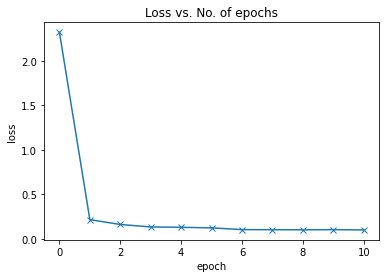

In [ ]:
# 注意在Lecture3中每次fit完後的結果都存在不同的變數名稱裡(如history0, history1...)，畫圖前，要先把這些結果合併(history=[history0+history1+...])，
# 在Lecture4中 每次每次fit完後的結果都疊加存於history，所以畫圖時，不需要再合併
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

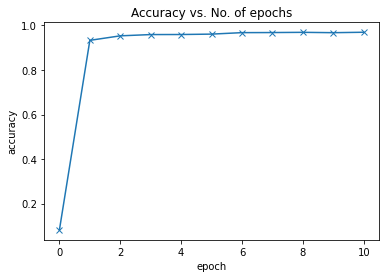

In [ ]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

Our current model outperforms the logistic regression model (which could only achieve around 86% accuracy) by a considerable margin! It quickly reaches an accuracy of 97% but doesn't improve much beyond this. To improve accuracy further, we need to make the model more powerful by increasing the hidden layer's size or adding more hidden layers with activations. I encourage you to try out both these approaches and see which one works better.

As a final step, we can save and commit our work using the `jovian` library.

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project='04-feedforward-nn', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..



[jovian] Updating notebook "aakashns/04-feedforward-nn" on https://jovian.ai/



[jovian] Uploading notebook..



[jovian] Committed successfully! https://jovian.ai/aakashns/04-feedforward-nn


'https://jovian.ai/aakashns/04-feedforward-nn'

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=ToTensor())

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model): ## img輸入 1 x 28 x28
    xb = to_device(img.unsqueeze(0), device) # 不用img.unsqueeze(0)，也直接用img可以
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)         # preds 是個tensor(值為index),_ 省略是 位置index的機率值
    return preds[0].item()

Let's try it out with a few images.

tensor([7])
Label: 7 , Predicted: 7


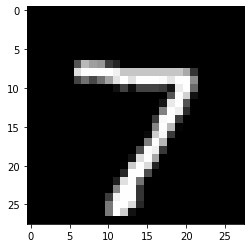

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 2


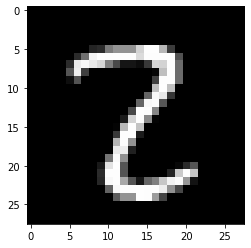

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


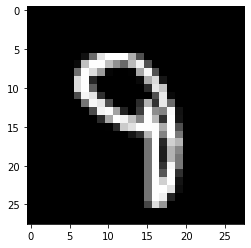

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.10274286568164825, 'val_acc': 0.9701172113418579}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

Let's save the model's weights and attach it to the notebook using `jovian.commit`. We will also record the model's performance on the test dataset using `jovian.log_metrics`.

In [ ]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_loss'])

[jovian] Metrics logged.


In [ ]:
torch.save(model.state_dict(), 'mnist-feedforward.pth')

In [ ]:
jovian.commit(project='04-feedforward-nn',
              environment=None,
              outputs=['mnist-feedforward.pth'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "henrykohl/04-feedforward-nn" on https://jovian.com

[jovian] Uploading additional outputs...

[jovian] Attaching records (metrics, hyperparameters, dataset etc.)

[jovian] Committed successfully! https://jovian.com/henrykohl/04-feedforward-nn


'https://jovian.com/henrykohl/04-feedforward-nn'

## Exercises

Try out the following exercises to apply the concepts and techniques you have learned so far:

* Coding exercises on end-to-end model training: https://jovian.ai/aakashns/03-cifar10-feedforward
* Starter notebook for deep learning models:  https://jovian.ai/aakashns/fashion-feedforward-minimal

Training great machine learning models reliably takes practice and experience. Try experimenting with different datasets, models and hyperparameters, it's the best way to acquire this skill.

## Summary and Further Reading

Here is a summary of the topics covered in this tutorial:

* We created a neural network with one hidden layer to improve upon the logistic regression model from the previous tutorial. We also used the ReLU activation function to introduce non-linearity into the model, allowing it to learn more complex relationships between the inputs (pixel densities) and outputs (class probabilities).

* We defined some utilities like `get_default_device`, `to_device` and `DeviceDataLoader` to leverage a GPU if available, by moving the input data and model parameters to the appropriate device.

* We were able to use the exact same training loop: the `fit` function we had define earlier to train out model and evaluate it using the validation dataset.

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:

* Try changing the size of the hidden layer, or add more hidden layers and see if you can achieve a higher accuracy.

* Try changing the batch size and learning rate to see if you can achieve the same accuracy in fewer epochs.

* Compare the training times on a CPU vs. GPU. Do you see a significant difference. How does it vary with the size of the dataset and the size of the model (no. of weights and parameters)?

* Try building a model for a different dataset, such as the [CIFAR10 or CIFAR100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html).

Here are some references for further reading:

* [A visual proof that neural networks can compute any function](http://neuralnetworksanddeeplearning.com/chap4.html), also known as the Universal Approximation Theorem.

* [But what *is* a neural network?](https://www.youtube.com/watch?v=aircAruvnKk) - A visual and intuitive introduction to what neural networks are and what the intermediate layers represent

* [Stanford CS229 Lecture notes on Backpropagation](https://github.com/BirajCoder/File-host-repo/blob/main/backprop.pdf) - for a more mathematical treatment of how gradients are calculated and weights are updated for neural networks with multiple layers.


You are now ready to move on to the next tutorial: [Image Classification using Convolutional Neural Networks](https://jovian.ai/aakashns/05-cifar10-cnn).

# <font color="red">關於Keras</font>
https://ithelp.ithome.com.tw/articles/10224345

## <font color="pink">解決問題</font>
##### *"Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance."*
https://blog.csdn.net/weixin_43159148/article/details/89609870 <br>
https://stackoverflow.com/questions/61214575/keras-tensor-flow-2-configproto <br>

In [ ]:
import tensorflow as tf
import os
# NUM_PARALLEL_EXEC_UNITS =8
# config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=NUM_PARALLEL_EXEC_UNITS, inter_op_parallelism_threads=2, allow_soft_placement=True, device_count = {'CPU': NUM_PARALLEL_EXEC_UNITS })
# session = tf.compat.v1.Session(config=config)
# tf.compat.v1.keras.backend.set_session(session)
tf.config.threading.set_inter_op_parallelism_threads(4)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# os.environ["OMP_NUM_THREADS"] = str(NUM_PARALLEL_EXEC_UNITS)

# os.environ["KMP_BLOCKTIME"] = "30"

# os.environ["KMP_SETTINGS"] = "1"

# os.environ["KMP_AFFINITY"]= "granularity=fine,verbose,compact,1,0"

In [ ]:
from keras.models import Sequential #引入Sequential函式
from keras.layers import Dense, Activation #引入層數及激勵函數

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 示範建立model (參考) https://stackoverflow.com/questions/61560888/keras-dense-layer-output-shape
model_example = Sequential([
    Dense(512, input_shape=(784,)),
    #Dense：全連接層 units=512 簡化成 512
    #輸入的張量，784神經元(或稱組數輸入)
    #512是輸出的神經元數量(或稱組數)
    Activation('relu'), #設定激活層並採用relu
])
print(model_example.summary()) #顯示目前網路架構 (param # = 784*512+512 = 401920)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras import optimizers

In [ ]:
import numpy as np

y_data = np.array([500000,275000,360000,780000,145000,280000,860000,200000,90000,680000])
x_data = np.array([55,27,33,70,13,26,89,21,10,67])

In [ ]:

model = Sequential()
model.add(Dense(1,input_shape=(1,))) #加入神經層第一層(1維)輸出1維(因為資料和輸出都是一維的)
# sgd = optimizers.SGD(lr=0.0001)
# sgd = optimizers.gradient_descent_v2.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.gradient_descent_v2.SGD(lr=0.0001)

#sgd是隨機梯度下降法，括號內學習率寫0.0001(資料比較少，過大的學習率會無法找到最佳解)
model.compile(loss = 'mse',optimizer = sgd) #設定model的loss和優化器(分別是MSE和SGD)

model.fit(x_data,y_data,epochs = 200) #1.x資料(坪數)2.y標籤(房價)3.epcohs是指疊代200次
pred = model.predict(x_data) #訓練好model使用predict預測看看在訓練的model跑的回歸線
W, b = model.layers[0].get_weights() #抓出全重和偏差
print('Weights=', W, '\nbiases=', b)



Epoch 1/200
1/1 [==============================] - 0s 268ms/step - loss: 241285152768.0000
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 68362088448.0000
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 19957141504.0000
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 6407537664.0000
Epoch 5/200
1/1 [==============================] - 0s 3ms/step - loss: 2614709760.0000
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 1553009792.0000
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 1255815936.0000
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 1172624512.0000
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 1149336064.0000
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 1142817024.0000
Epoch 11/200
1/1 [==============================] - 0s 3ms/step - loss: 1140991232.0000
Epoch 12/200
1/1 [=================

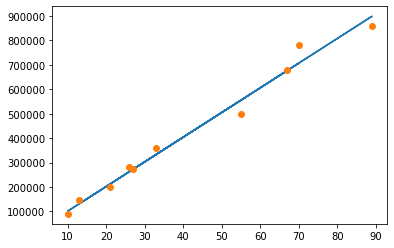

In [ ]:
plt.plot(x_data,pred) #畫出回歸線
plt.plot(x_data, y_data, 'o') #畫出原本的點

# <font color="red">Keras 手寫辨識 MNIST</font>
https://medium.com/bryanyang0528/deep-learning-keras-mnist-b41757567684

In [ ]:
# 展示
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, ReLU
# from keras.optimizers import RMSprop (錯誤)
from tensorflow.keras.optimizers import RMSprop

from matplotlib.pyplot import imshow
import numpy as np

In [ ]:
# 只能在 Tensorflow 1.X 運行
from keras import backend as K # 或 import tensorflow.keras.backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'tensorflow.keras.backend' has no attribute 'tensorflow_backend'

#### 參考
https://stackoverflow.com/questions/63049620/module-keras-backend-has-no-attribute-tensorflow-backend

In [ ]:
#
# import tensorflow as tf
# tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [ ]:
#
# tf.test.is_built_with_cuda

<function tensorflow.python.platform.test.is_built_with_cuda()>

In [ ]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
# type(x_train)

numpy.ndarray

In [ ]:
# convert class vectors to binary class matrices 十進制轉one-hot code
# y_train_c = keras.utils.to_categorical(y_train, num_classes) # 新版tensorflow不能用了
# y_test_c = keras.utils.to_categorical(y_test, num_classes)   # 新版tensorflow不能用了

y_train_c = keras.utils.np_utils.to_categorical(y_train, num_classes=10)
y_test_c = keras.utils.np_utils.to_categorical(y_test, num_classes=10)

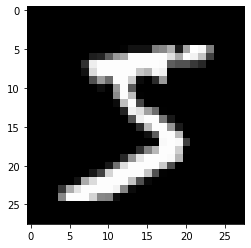

In [ ]:
# 展示用
x_sample_0 = x_train[0].reshape(28,28)
imshow(x_sample_0, cmap='gray')

In [ ]:
# 避免 "so returning NUMA node zero" 解決辦法
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
model = Sequential()
model.add(Dense(20, activation=LeakyReLU(), input_shape=(784,)))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
# y_train與y_test 改成了 y_train_c與y_test_c
batch_size = 128
num_classes = 10
epochs = 10
history = model.fit(x_train, y_train_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_c))

Epoch 1/10
469/469 [==============================] - 4s 3ms/step - loss: 0.5550 - accuracy: 0.8478 - val_loss: 0.3010 - val_accuracy: 0.9130
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2810 - accuracy: 0.9195 - val_loss: 0.2583 - val_accuracy: 0.9263
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2466 - accuracy: 0.9290 - val_loss: 0.2286 - val_accuracy: 0.9333
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2252 - accuracy: 0.9359 - val_loss: 0.2275 - val_accuracy: 0.9312
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2085 - accuracy: 0.9409 - val_loss: 0.2106 - val_accuracy: 0.9391
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1943 - accuracy: 0.9452 - val_loss: 0.2034 - val_accuracy: 0.9394
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1822 - accuracy: 0.9479 - val_loss: 0.1864 - val_accuracy: 0.9459
Epoch 

# <font color="red">Keras自我練習</font>
用Keras實做之前Pytorch實做的版本

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, ReLU

from matplotlib.pyplot import imshow
import numpy as np
# %matplotlib inline

In [ ]:
# 下載資料
(train_data, train_label), (test_data, test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 資料處理
train_data_c = train_data.reshape(60000, 784) # 整數型
test_data_c = test_data.reshape(10000, 784)   # 整數型
train_data_c = train_data_c.astype('float32') # 轉成float32
test_data_c = test_data_c.astype('float32')   # 轉成float32
train_data_c /= 255                           # 歸一化
test_data_c /= 255                            # 歸一化
print(train_data_c.shape[0], 'train samples')
print(test_data_c.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
# train資料的label與test資料的label轉換成one-hot code
train_label_c = keras.utils.np_utils.to_categorical(train_label, num_classes=10)
test_label_c = keras.utils.np_utils.to_categorical(test_label, num_classes=10)

In [ ]:
# 避免 警告"so returning NUMA node zero"出現 解決辦法
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
# 定義model
batch_size = 128
input_size = 784
hidden_size = 32
num_classes = 10

model_cus = Sequential()
model_cus.add(Dense(hidden_size, activation=ReLU(), input_shape=(input_size,)))
model_cus.add(Dense(num_classes))

model_cus.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 模型編譯
from tensorflow.keras.optimizers import RMSprop

from keras import optimizers
sgd = optimizers.gradient_descent_v2.SGD(lr=0.5) # 0.5 比 0.1 有效


# 無效
# model_cus.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(),
#               metrics=['accuracy'])

# 有效
# model_cus.compile(loss='mse',
#               optimizer=RMSprop(),
#               metrics=['accuracy'])
# 有效
model_cus.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model_cus.fit(train_data_c, train_label_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_data_c, test_label_c))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0452 - accuracy: 0.7753 - val_loss: 0.0294 - val_accuracy: 0.8804
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0251 - accuracy: 0.8930 - val_loss: 0.0207 - val_accuracy: 0.9137
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0203 - accuracy: 0.9097 - val_loss: 0.0185 - val_accuracy: 0.9194
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.9156 - val_loss: 0.0175 - val_accuracy: 0.9241
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 0.9200 - val_loss: 0.0170 - val_accuracy: 0.9235
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0172 - accuracy: 0.9219 - val_loss: 0.0165 - val_accuracy: 0.9274
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0167 - accuracy: 0.9256 - val_loss: 0.0162 - val_accuracy: 0.9295
Epoch 

# <font color="red">建立model的兩個方法</font>
### <font color="red">不用Input()</font>
### <font color="red">使用Input()</font>


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, ReLU

noise_shape = (100,)
noise = Input(shape=noise_shape)

In [ ]:
noise.shape

TensorShape([None, 100])

In [ ]:
# model_1
model_1 = Sequential()
model_1.add(Dense(16, activation='softmax', input_shape=(32,)))

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                528       
Total params: 528
Trainable params: 528
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model_2
x = Input(shape=(32,))
y = Dense(16, activation='softmax')(x)
model_2 = keras.Model(x, y )

model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
Total params: 528
Trainable params: 528
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def build_generator(self):

    noise_shape = (100,)

    model = Sequential()

    model.add(Dense(256, input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(np.prod(self.img_shape), activation='tanh'))
    model.add(Reshape(self.img_shape))

    model.summary()

    noise = Input(shape=noise_shape)
    img = model(noise)

    return Model(noise, img)
# noise = Input(shape=noise_shape)
# img = model(noise)